# Introdução

Olá, seja bem-vinda e bem-vindo ao notebook da **aula 03**! A partir desta aula iremos analisar e discutir uma base de dados junto com você. Por isso, será **importante que as discussões nos vídeos sejam acompanhadas** para entender todos os processos das análises.



Nessa aula utilizaremos uma base totalmente nova, que nós também não conhecíamos até o momento da análise. Você vai acompanhar a exploração e, principalmente, as dificuldades ao analisar uma base de dados desconhecida.

Vamos começar importando a nossa base de dados! Nessa aula iremos trabalhar com a IMBD 5000, base que contém uma série de informações sobre filmes, sendo uma pequena amostra da famosa base de dados [IMBD](https://www.imdb.com/).

In [1]:
import pandas as pd
imdb = pd.read_csv("https://gist.githubusercontent.com/guilhermesilveira/24e271e68afe8fd257911217b88b2e07/raw/e70287fb1dcaad4215c3f3c9deda644058a616bc/movie_metadata.csv")
imdb.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


Como você acompanhou, iniciamos a aula tentando conhecer as diversas colunas de cada filme e uma das que chamou mais a atenção foi a color. Vamos conhecer quais valores temos nesta colunas?!

In [2]:
imdb["color"].unique()

array(['Color', nan, ' Black and White'], dtype=object)

Verificamos que essa coluna **color** informa se o filme é colorido ou é preto e branco. Vamos descobrir agora quantos filmes de cada tipo nós temos:

In [3]:
imdb["color"].value_counts()

Color               4815
 Black and White     209
Name: color, dtype: int64

In [4]:
imdb["color"].value_counts(normalize=True)

Color               0.9584
 Black and White    0.0416
Name: color, dtype: float64

Agora já descobrimos quantos filmes coloridos e preto e branco temos, e também sabemos que há mais de 5000 filmes na base. Fizemos algo novo, que foi chamar o `value_counts()`, passando o parâmetro **normalize como True**. Desse modo, já calculamos qual é a participação de cada um dos tipos de filmes (**95% são filmes coloridos**).

Excelente! Agora vamos explorar outra coluna a fim de conhecer os diretores que tem mais filmes na nossa base de dados (**lembrando que nossa base é uma amostra muito pequena da realidade**)

In [5]:
imdb["director_name"].value_counts()

Steven Spielberg        26
Woody Allen             22
Clint Eastwood          20
Martin Scorsese         20
Ridley Scott            17
Spike Lee               16
Tim Burton              16
Steven Soderbergh       16
Renny Harlin            15
Oliver Stone            14
Joel Schumacher         13
John Carpenter          13
Barry Levinson          13
Ron Howard              13
Sam Raimi               13
Robert Zemeckis         13
Robert Rodriguez        13
Michael Bay             13
Richard Donner          12
Peter Jackson           12
Wes Craven              12
Tony Scott              12
Shawn Levy              12
Kevin Smith             12
Brian De Palma          12
Rob Cohen               11
Stephen Frears          11
Francis Ford Coppola    11
Richard Linklater       11
Chris Columbus          11
                        ..
Vivek Agnihotri          1
Georg Wilhelm Pabst      1
Monte Hellman            1
Andrew Douglas           1
Michel Leclerc           1
François Girard          1
N

**Steven Spielberg e Woody Allen** são os diretores com mais filmes no **IMDB 5000**.

Continuando com nossa exploração de algumas informações, vamos olhar para o número de críticas por filmes.

In [6]:
imdb["num_critic_for_reviews"]

0       723.0
1       302.0
2       602.0
3       813.0
4         NaN
5       462.0
6       392.0
7       324.0
8       635.0
9       375.0
10      673.0
11      434.0
12      403.0
13      313.0
14      450.0
15      733.0
16      258.0
17      703.0
18      448.0
19      451.0
20      422.0
21      599.0
22      343.0
23      509.0
24      251.0
25      446.0
26      315.0
27      516.0
28      377.0
29      644.0
        ...  
5013     28.0
5014     58.0
5015     61.0
5016      NaN
5017      1.0
5018      5.0
5019     43.0
5020      NaN
5021     51.0
5022      6.0
5023     22.0
5024     42.0
5025     73.0
5026     81.0
5027     64.0
5028     12.0
5029     78.0
5030      NaN
5031     13.0
5032     10.0
5033    143.0
5034     35.0
5035     56.0
5036      NaN
5037     14.0
5038      1.0
5039     43.0
5040     13.0
5041     14.0
5042     43.0
Name: num_critic_for_reviews, Length: 5043, dtype: float64

In [7]:
imdb["num_critic_for_reviews"].describe()

count    4993.000000
mean      140.194272
std       121.601675
min         1.000000
25%        50.000000
50%       110.000000
75%       195.000000
max       813.000000
Name: num_critic_for_reviews, dtype: float64

Veja que as colunas **color** e **director_name** são *strings*, não fazendo sentido olhar para médias, medianas e afins. Olhar para o número de avaliações já pode ser interessante, por isso usamos o `.describe()`.

Agora podemos até plotar um histograma para avaliar o número de review.

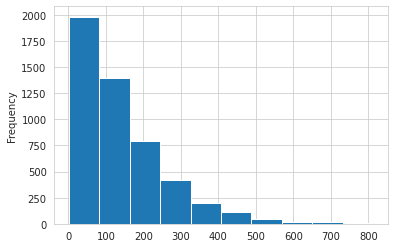

In [8]:
import seaborn as sns
sns.set_style("whitegrid")
imdb["num_critic_for_reviews"].plot(kind='hist')

Verificamos que poucos filmes tem mais de 500 votos, por isso um paralelo que podemos fazer é que filmes com muitos votos são mais populares e filmes com poucos votos não são tão populares. Logo, pelo histograma fica evidente que poucos filmes fazem muito muito sucesso. Claro que não conseguimos afirmar isso com propriedade, pois, novamente, estamos lidando com um número restrito de dados, mas são pontos interessantes de se pensar.

Outra informação interessante de se analisar, são os orçamentos e receitas de um filme, ou seja o aspecto financeiro. Vamos começar pelo gross:

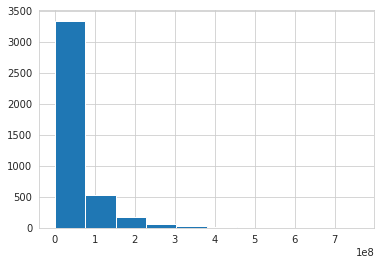

In [9]:
imdb["gross"].hist()

 Como você deve ter reparado, essa é a primeira vez que as escalas estão totalmente diferentes, pois no eixo **X** temos valores tão altos que a escala teve que ser de centena de milhões. Veja como pouquíssimos filmes tem **alto faturamento**, o que nos acende um primeiro alerta de que tem algo estranho (ou temos filmes que rendem muito dinheiro neste dataset).

 Vamos tentar conhecer quais são esses filmes com faturamento astronômico.


In [10]:
imdb.sort_values("gross", ascending=False).head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
26,Color,James Cameron,315.0,194.0,0.0,794.0,Kate Winslet,29000.0,658672302.0,Drama|Romance,...,2528.0,English,USA,PG-13,200000000.0,1997.0,14000.0,7.7,2.35,26000
29,Color,Colin Trevorrow,644.0,124.0,365.0,1000.0,Judy Greer,3000.0,652177271.0,Action|Adventure|Sci-Fi|Thriller,...,1290.0,English,USA,PG-13,150000000.0,2015.0,2000.0,7.0,2.00,150000
794,Color,Joss Whedon,703.0,173.0,0.0,19000.0,Robert Downey Jr.,26000.0,623279547.0,Action|Adventure|Sci-Fi,...,1722.0,English,USA,PG-13,220000000.0,2012.0,21000.0,8.1,1.85,123000
17,Color,Joss Whedon,703.0,173.0,0.0,19000.0,Robert Downey Jr.,26000.0,623279547.0,Action|Adventure|Sci-Fi,...,1722.0,English,USA,PG-13,220000000.0,2012.0,21000.0,8.1,1.85,123000


Nessa lista temos **Avatar, Titanic, Jurassic World e The Avengers**, o que parece fazer sentido para nós, pois sabemos que esses foram filmes com bilheterias gigantescas. Analisando esses dados conseguimos verificar que os maiores faturamentos fazem sentido, mas encontramos um problema nos dados, dado que encontramos duas linhas diplicadas. Podemos usar o pandas para remover esses dados, mas por enquanto vamos manter todas as informações (Se estiver curioso em saber como se faz, consulte o [`.drop_duplicates()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop_duplicates.html)).

Maravilha, agora temos o faturamento e parece estar OK. Queremos começar a responder algumas perguntas e uma delas é: será que filmes coloridos tem faturamento maior que filmes preto e branco?

Para começar a responder essa pergunta precisamos transformar a coluna Color:

In [11]:
color_or_bw = imdb.query("color in ['Color', ' Black and White']")
color_or_bw["color_0_ou_1"] = (color_or_bw["color"]=="Color") * 1
color_or_bw["color_0_ou_1"].value_counts()

/home/liliane-hop/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


1    4815
0     209
Name: color_0_ou_1, dtype: int64

In [12]:
color_or_bw.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,color_0_ou_1
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,1
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,1
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,1
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,1
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,1


Veja que agora nós temos uma última coluna em nosso dataframe com valores 0 e 1. Agora podemos construir gráficos com essa informação de filmes coloridos ou não.

P.S: Em aula tivemos problemas porque Black and White tinha um espaço no início, vou cortar esses detalhes aqui no notebook, mas reforço a importância de acompanhar este processo no vídeo.

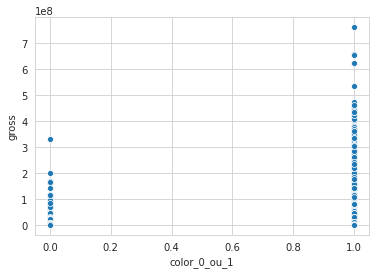

In [13]:
sns.scatterplot(data=color_or_bw, x="color_0_ou_1", y="gross")

Então plotamos nossos dados com um displot! Existem várias formas de visualizar essa informação, mas por ora essa nos ajuda a comparar os resultados. Repare como filmes coloridos tem valores bem maiores (isso já era até esperado), mas também temos pontos bem altos em filmes preto e branco, chamando muito atenção.

Vamos explorar algumas estatísticas destes filmes:

In [14]:
color_or_bw.groupby("color").mean()["gross"]

color
 Black and White    3.245702e+07
Color               4.902619e+07
Name: gross, dtype: float64

In [15]:
color_or_bw.groupby("color").mean()["imdb_score"]

color
 Black and White    7.227273
Color               6.409533
Name: imdb_score, dtype: float64

In [16]:
color_or_bw.groupby("color").median()["imdb_score"]

color
 Black and White    7.4
Color               6.5
Name: imdb_score, dtype: float64

Das estatísticas temos duas bem interessantes, a média e mediana das notas de filmes preto e branco são maiores. Há várias possíveis explicações sobre o porquê disso, reflita aí sobre algumas delas e compartilhe conosco!


A partir de agora, vamos fazer uma investigação melhor em relação às finanças dos filmes (faturamento e orçamento). Vamos iniciar plotando e interpretando um gráfico de **gross** por **budget**:

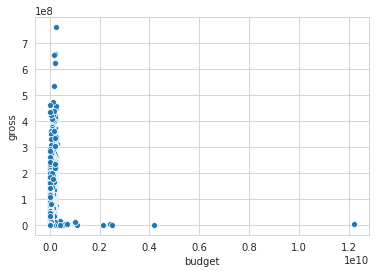

In [17]:
budget_gross=  imdb[["budget", "gross"]].dropna().query("budget >0 | gross > 0")

sns.scatterplot(x="budget", y="gross", data = budget_gross)

Para plotar os dados, primeiro removemos as linhas com informações de faturamento e orçamento vazias e também com valores igual a 0, para então gerar o gráfico.

Agora vamos analisar esse gráfico juntos, veja que a escala de **budget** mudou, agora é **e10**. Repare que apenas poucos filmes tem orçamentos tão grandes assim, e seus faturamentos são muito baixos. Será que temos algum problema nos dados? Vamos investigar melhor!

In [18]:
imdb.sort_values("budget", ascending=False).head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
2988,Color,Joon-ho Bong,363.0,110.0,584.0,74.0,Kang-ho Song,629.0,2201412.0,Comedy|Drama|Horror|Sci-Fi,...,279.0,Korean,South Korea,R,1.221550e+10,2006.0,398.0,7.0,1.85,7000
3859,Color,Chan-wook Park,202.0,112.0,0.0,38.0,Yeong-ae Lee,717.0,211667.0,Crime|Drama,...,131.0,Korean,South Korea,R,4.200000e+09,2005.0,126.0,7.7,2.35,4000
3005,Color,Lajos Koltai,73.0,134.0,45.0,0.0,Péter Fancsikai,9.0,195888.0,Drama|Romance|War,...,45.0,Hungarian,Hungary,R,2.500000e+09,2005.0,2.0,7.1,2.35,607
2323,Color,Hayao Miyazaki,174.0,134.0,6000.0,745.0,Jada Pinkett Smith,893.0,2298191.0,Adventure|Animation|Fantasy,...,570.0,Japanese,Japan,PG-13,2.400000e+09,1997.0,851.0,8.4,1.85,11000
2334,Color,Katsuhiro Ôtomo,105.0,103.0,78.0,101.0,Robin Atkin Downes,488.0,410388.0,Action|Adventure|Animation|Family|Sci-Fi|Thriller,...,79.0,Japanese,Japan,PG-13,2.127520e+09,2004.0,336.0,6.9,1.85,973


Ordenando os dados pelo **budget** percebemos que as primeiras posições são de filmes asiáticos. O Guilherme trouxe um ponto interessante para a investigação, pois países como a Coreia usam moedas que tem três casas decimais a mais que o dólar. Então provavelmente o que está ocorrendo é que os dados de orçamento tem valores na moeda local, por isso detectamos valores tão discrepantes. 

Como não temos garantia dos números, vamos precisar trabalhar apenas com filmes americanos, assim garantimos que tanto gross e budget estão em dólares. Então vamos iniciar esse processo:

In [19]:
imdb["country"].unique()

array(['USA', 'UK', nan, 'New Zealand', 'Canada', 'Australia', 'Belgium',
       'Japan', 'Germany', 'China', 'France', 'New Line', 'Mexico',
       'Spain', 'Hong Kong', 'Czech Republic', 'India', 'Soviet Union',
       'South Korea', 'Peru', 'Italy', 'Russia', 'Aruba', 'Denmark',
       'Libya', 'Ireland', 'South Africa', 'Iceland', 'Switzerland',
       'Romania', 'West Germany', 'Chile', 'Netherlands', 'Hungary',
       'Panama', 'Greece', 'Sweden', 'Norway', 'Taiwan', 'Official site',
       'Cambodia', 'Thailand', 'Slovakia', 'Bulgaria', 'Iran', 'Poland',
       'Georgia', 'Turkey', 'Nigeria', 'Brazil', 'Finland', 'Bahamas',
       'Argentina', 'Colombia', 'Israel', 'Egypt', 'Kyrgyzstan',
       'Indonesia', 'Pakistan', 'Slovenia', 'Afghanistan',
       'Dominican Republic', 'Cameroon', 'United Arab Emirates', 'Kenya',
       'Philippines'], dtype=object)

Veja que temos filmes de diversos locais de origem:

In [20]:
imdb = imdb.drop_duplicates()
imdb_usa = imdb.query("country == 'USA'")
imdb_usa.sort_values("budget", ascending=False).head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
7,Color,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,...,387.0,English,USA,PG,260000000.0,2010.0,553.0,7.8,1.85,29000
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0
3461,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0


Agora temos os dados para fazer uma análise melhor entre gross e budget. Vamos plotar o gráfico novamente:



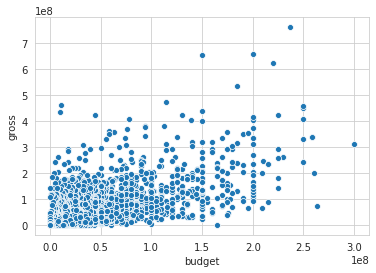

In [21]:
budget_gross = imdb_usa[["budget", "gross"]].dropna().query("budget >0 | gross > 0")

sns.scatterplot(x="budget", y="gross", data = budget_gross)

Veja que interessante, aparentemente temos uma relação entre orçamento e faturamento. Quanto maior o orçamento, maior o faturamento.

Já que estamos trabalhando com orçamento e faturamento, podemos construir uma nova informação, o lucro, para analisar. De forma bem simplista esse processo de construir novas informações a partir das existentes no dataset é conhecido como [feature engineering](https://en.wikipedia.org/wiki/Feature_engineering).

/home/liliane-hop/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


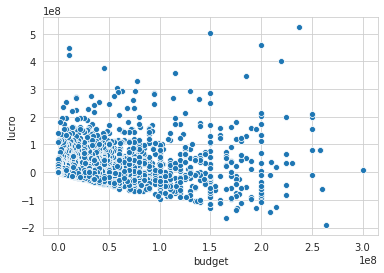

In [22]:
imdb_usa['lucro'] = imdb_usa['gross'] - imdb_usa['budget']

budget_gross = imdb_usa.query("budget >0 | gross > 0")[["budget", "lucro"]].dropna()

sns.scatterplot(x="budget", y="lucro", data = budget_gross)

MUito bom! Nós construímos nossa coluna lucro na base de dados e plotamos o orçamento contra lucro.

Repare que temos pontos interessantes nesta visualização, um deles são esses filmes com muito custo e prejuizo. Isso pode ser um prejuizo real, mas também podem ser filmes que ainda não tiveram tempo de recuperar o investimento (lançamentos recentes). Outros pontos interessantes de se anlisar seriam os filmes com baixos orçamentos e muito lucro, será que são estão corretos ou pode ser algum erro da base? Parece que nem sempre gastar uma tonelada de dinheiro vai gerar lucros absurdos, será que é isso é verdade? 

Esse gráfico é muito rico em informações, vale a pena você gastar um tempo criando hipóteses.

Já que essa nova feature (lucro) parace ser interessante de se analisar, vamos continuar! Mas agora quero ver o lucro em relação ao ano de produção:

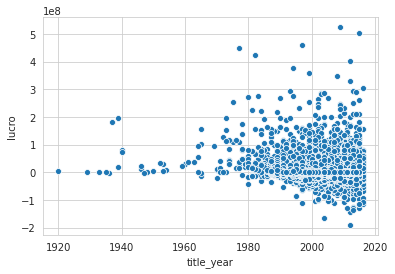

In [23]:
budget_gross = imdb_usa.query("budget >0 | gross > 0")[["title_year", "lucro"]].dropna()

sns.scatterplot(x="title_year", y="lucro", data = budget_gross)

Olha que legal esse gráfico, veja como alguns pontos mais recentes reforça a teoria de que alguns filmes podem ainda não ter recuperado o dinheiro investido (Claro que temos muitas variáveis para se analisar, mas é um indício relevante).

Outro ponto que chama muito atenção, são os filmes da década de 30 e 40 com lucros tão altos. Quais serão esses filmes? Bom, essa pergunta você vai responder no desafio do Paulo, que está louco para descobrir!

Falando em Paulo, ele sugeriu uma análise com os nome dos diretores e o orçamento de seus filmes, vamos ver se conseguimos concluir alguma coisa:

In [24]:
filmes_por_diretor = imdb_usa["director_name"].value_counts()
gross_director = imdb_usa[["director_name", "gross"]].set_index("director_name").join(filmes_por_diretor, on="director_name")
gross_director.columns=["dindin", "filmes_irmaos"]
gross_director = gross_director.reset_index()
gross_director.head()

,director_name,dindin,filmes_irmaos
0,James Cameron,760505847.0,6.0
1,Gore Verbinski,309404152.0,7.0
2,Christopher Nolan,448130642.0,8.0
3,Andrew Stanton,73058679.0,3.0
4,Sam Raimi,336530303.0,11.0


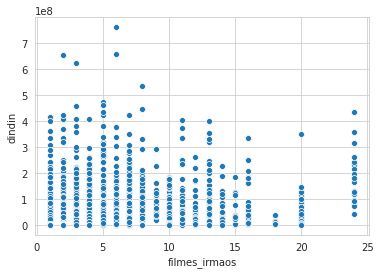

In [25]:
sns.scatterplot(x="filmes_irmaos", y="dindin", data = gross_director)

Essa imagem aparentemente não é muito conclusiva, então não conseguimos inferir tantas informações.

Esse processo de gerar dados, visualizações e acabar não sendo conclusivo é muito comum na vida de um cientista de dados, pode ir se acostumando =P.

Para finalizar, que tal realizar uma análise das correlações dos dados? EXistem várias formas de calcular a correlação, esse é um assunto denso.Você pode ler mais sobre essas métricas neste [link](https://pt.wikipedia.org/wiki/Correla%C3%A7%C3%A3o).

Vamos então inciar a análise das correlações plotando o pairplot.

/home/liliane-hop/.local/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/liliane-hop/.local/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


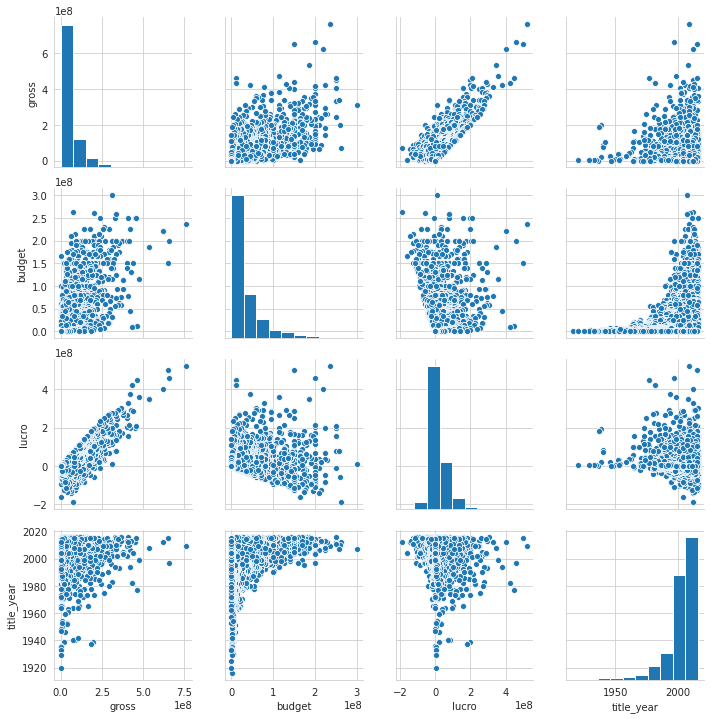

In [26]:
sns.pairplot(data = imdb_usa[["gross", "budget", "lucro", "title_year"]])

O pairplot mostra muita informação e a melhor forma de você entender é assistindo as conclusões que tiramos sobre esses gráficos na vídeoaula.

Embora plotamos um monte de informação, não necessariamente reduzimos a correlação em um número para simplificar a análise. Vamos fazer isso com a ajuda do `.corr()` do [pandas](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html). 

In [27]:
imdb_usa[["gross", "budget", "lucro", "title_year"]].corr()

,gross,budget,lucro,title_year
gross,1.000000,0.645673,0.797037,0.034827
budget,0.645673,1.000000,0.053455,0.229453
lucro,0.797037,0.053455,1.000000,-0.123035
title_year,0.034827,0.229453,-0.123035,1.000000


Com o pandas é simples de se calcular a correlação, mas precisamos saber interpretar os resultados. Vamos fazer isso?

A correlação é uma métrica que vai de 1 a -1. Quando a correlação é 1, dizemos que é totalmente correlacionada (relação linear perfeita e positiva), ou seja se uma variável aumenta em 10 a outra também irá aumentar em 10. Quando o valor da correlação é -1, também temos variáveis totalmente correlacionda, só que de maneira negativa (relação linear perfeita negativa), neste caso, se uma variável aumenta em 10 a outra reduz em 10. Agora quando a correlação é 0 temos a inexistência de correlação, ou seja, uma variável não tem influêcia sobre a outra. 

Agora sim, entendido sobre a correlação vamos analisar as nossas. Veja que lucro e gross tem uma correlação alta, o que indica que quanto maior o orçamento maior o lucro (mas repare que a correlação não é perfeita), já o title_yers e lucro tem correlação negativa, mas muito perto de zero (ou seja quase não tem correlação). Viu como conseguimos analisar muitas coisas com a correlação?! Pense e tente analisar os outros casos também.


Com isso chegamos ao final de mais uma aula da #quarentenadados. E aí, o que está achando, cada vez mais legal e ao mesmo tempo mais complexo né?

O que importa é estar iniciando e entendendo o que fazemos para analisar os dados! **Continue até o fim, garanto que vai valer a pena.**
Vamos praticar?

**Crie seu próprio notebook, reproduza nossa aula e resolva os desafios que deixamos para vocês**.


Até a próxima aula!

**P.S: A partir de agora teremos muitos desafios envolvendo mais análises e conclusões, então não haverá um "gabarito". O importante é você compartilhar suas soluções com os colegas e debater os seus resultados e das outras pessoas**

## Desafio 1 do [Thiago Gonçalves](https://twitter.com/tgcsantos)

Plotar e analisar o Boxplot da média (coluna imdb_score) dos filmes em preto e branco e coloridos.

In [28]:
import matplotlib.pyplot as plt
import matplotlib

matplotlib.style.use(['seaborn'])
%matplotlib inline

In [29]:
coloridos = color_or_bw.query("color=='Color'")[['color', 'imdb_score']]
coloridos.describe()

,imdb_score
count,4815.000000
mean,6.409533
std,1.119593
min,1.600000
25%,5.800000
50%,6.500000
75%,7.200000
max,9.500000


In [30]:
preto_e_branco = color_or_bw.query("color == ' Black and White'")[['color', 'imdb_score']]
preto_e_branco.describe()

,imdb_score
count,209.000000
mean,7.227273
std,0.907380
min,4.100000
25%,6.700000
50%,7.400000
75%,8.000000
max,8.900000


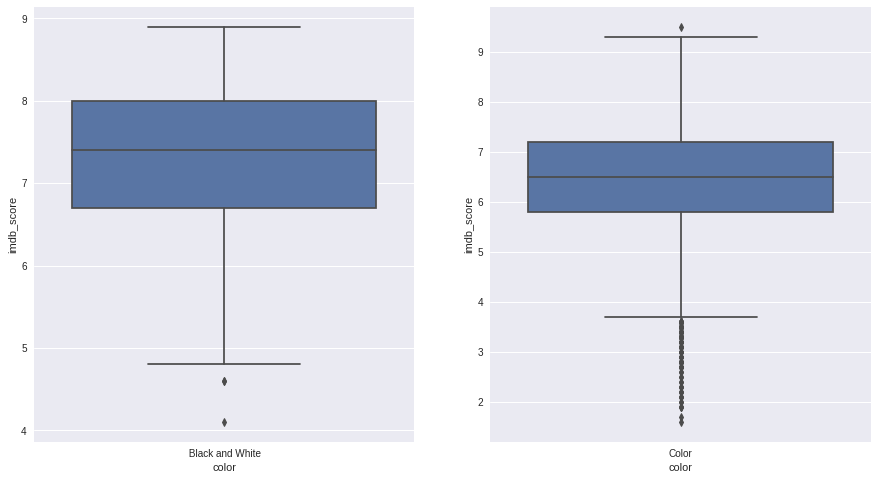

In [31]:
_, ax = plt.subplots(ncols=2, figsize=[15, 8])

sns.boxplot(data=preto_e_branco, x='color', y='imdb_score', ax=ax[0])
sns.boxplot(data=coloridos, x='color', y='imdb_score', ax=ax[1])
plt.show()

## Desafio 2 do [Guilherme Silveira](https://twitter.com/guilhermecaelum)

No gráfico de **budget por lucro** temos um ponto com muito custo e prejuizo, descubra com é esse filme (budget próximo de 2.5).

In [32]:
select = imdb_usa.query('lucro <= 0.200000000 and budget <= 2600000000')
select.sort_values(by='lucro', ascending=True).head(1)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,lucro
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,-190641321.0


## Desafio 3 do [Guilherme Silveira](https://twitter.com/guilhermecaelum)

Em aula falamos que talvez, filmes mais recentes podem ter prejuizo pois ainda não tiveram tempo de recuperar o investimento. Analise essas informações e nos conte quais foram suas conclusões.

In [33]:
imdb_usa.dropna(inplace=True)
filmes_mais_recentes = imdb_usa.query('title_year>=2015.0')
filmes_mais_recentes['title_year'].unique()

/home/liliane-hop/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


array([2015., 2016.])

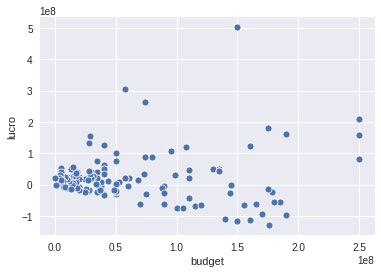

In [34]:
sns.scatterplot(x='budget', y='lucro', data=filmes_mais_recentes)

O que pode ser inferido é que apenas alguns filmes conseguiram recuperar o investimento até a data de geração desses dados, mas não pode-se dizer com certeza que o motivo seja pela falta de tempo.

## Desafio 4 do [Paulo Silveira](https://twitter.com/paulo_caelum)

Quais foram os filmes da decada pré 2° guerra que tiveram muito lucro.

In [35]:
filmes_pre_guerra = imdb_usa.query('title_year<1939')
filmes_pre_guerra.shape

(5, 29)

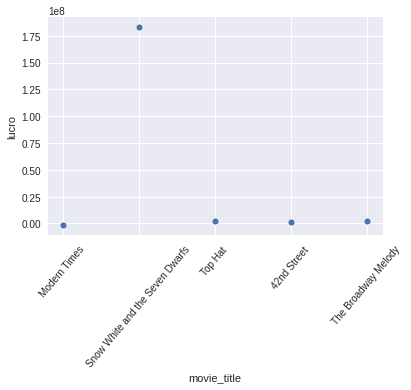

In [36]:
g = sns.scatterplot(x='movie_title', y='lucro', data=filmes_pre_guerra)
g.set_xticklabels(filmes_pre_guerra['movie_title'], rotation=50)
plt.show()

## Desafio 5 do [Paulo Silveira](https://twitter.com/paulo_caelum)

No gráfico de **filmes_irmaos por dindin** temos alguns pontos estranhos entre 15 e 20. Confirme a tese genial do Paulo que o cidadão estranho é o Woody Allen. (Se ele tiver errado pode cornete nas redes sociais kkkkk)

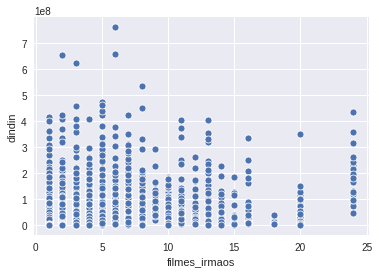

In [37]:
sns.scatterplot(x="filmes_irmaos", y="dindin", data = gross_director)
plt.show()

In [38]:
print('Cidadão estranho: {}'.format(gross_director.query('filmes_irmaos >16 and filmes_irmaos < 19')['director_name'].unique()[0]))

Cidadão estranho: Woody Allen


## Desafio 6 do [Thiago Gonçalves](https://twitter.com/tgcsantos)

Analise mais detalhadamente o gráfico pairplot, gaste um tempo pensando e tentando enteder os gráficos.

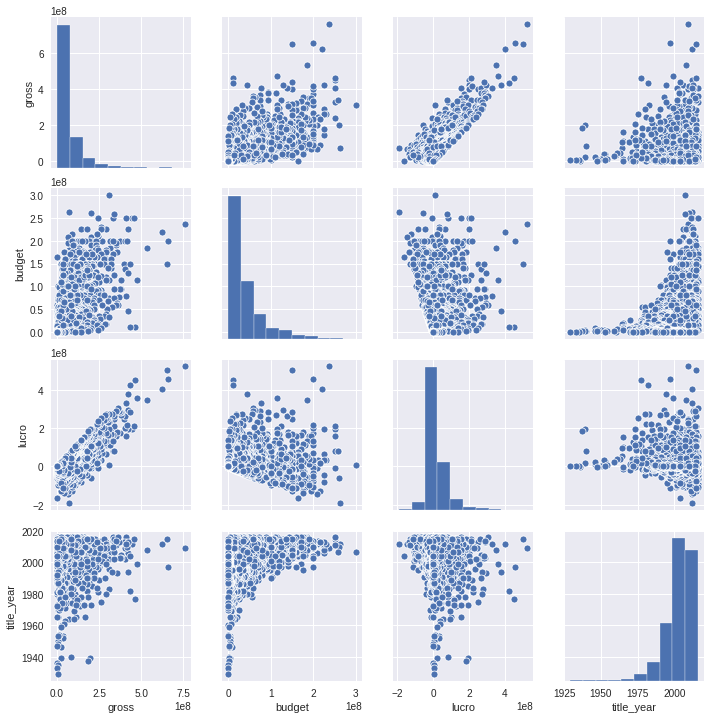

In [39]:
sns.pairplot(data = imdb_usa[["gross", "budget", "lucro", "title_year"]])
plt.show()

Existe uma correlação positiva entre gross x lucro e gross x budget. Não existe uma correlação significativa entre title_year x as demais variáveis. A correlação entre gross x lucro é forte.

## Desafio 7 do [Thiago Gonçalves](https://twitter.com/tgcsantos)

Calcular a correlação apenas dos filmes pós anos 2000 (Jogar fora filmes antes de 2000) e interpretar essa correlação.

In [40]:
filmes_pos_2000 = imdb_usa.query('title_year >= 2000')
print('Shape: {}'.format(filmes_pos_2000.shape))
filmes_pos_2000['title_year'].unique()

Shape: (2120, 29)


array([2009., 2007., 2012., 2010., 2015., 2016., 2006., 2013., 2008.,
       2011., 2004., 2014., 2005., 2003., 2001., 2002., 2000.])

In [41]:
filmes_pos_2000[['gross', 'budget', 'lucro', 'title_year']].corr()

,gross,budget,lucro,title_year
gross,1.000000,0.703718,0.772080,0.122418
budget,0.703718,1.000000,0.091799,0.148680
lucro,0.772080,0.091799,1.000000,0.038580
title_year,0.122418,0.148680,0.038580,1.000000


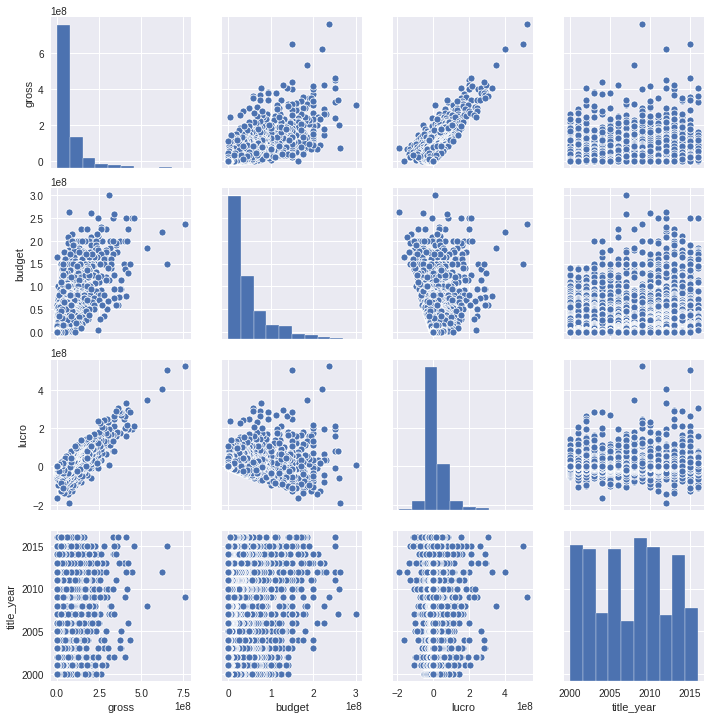

In [42]:
sns.pairplot(data=filmes_pos_2000[['gross', 'budget', 'lucro', 'title_year']])
plt.show()

Uma coisa interessante é que a correlação entre ano e lucro deixou de ser negativa, embora ainda continue quase nula. A correlação se manteve positiva e forte entre lucro x gross e gross x budget.

## Desafio 8 do [Allan Spadini](https://twitter.com/allanspadini)

Tentar encontrar uma reta, pode ser com uma régua no monitor (não faça isso), com o excel/google sheets, com o python, no gráfico que parece se aproximar com uma reta (por exemplo budget/lucro, gross/lucro)

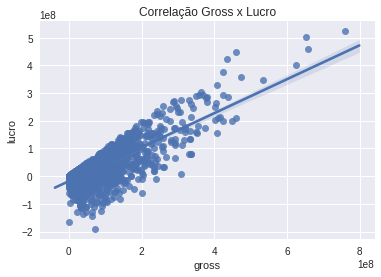

In [43]:
sns.regplot(x=imdb_usa['gross'], y=imdb_usa['lucro'], data=imdb_usa)

plt.rcParams['figure.figsize'] = [12, 6]
plt.title('Correlação Gross x Lucro')
plt.show()

## Desafio 9 da [Thais André](https://twitter.com/thais_tandre)

Analisar e interpretar a correlação de outras variáveis além das feitas em sala (notas é uma boa). Número de avaliações por ano pode ser também uma feature.


In [44]:
imdb_usa[['lucro', 'gross', 'imdb_score']].corr()

,lucro,gross,imdb_score
lucro,1.000000,0.798102,0.297647
gross,0.798102,1.000000,0.270734
imdb_score,0.297647,0.270734,1.000000


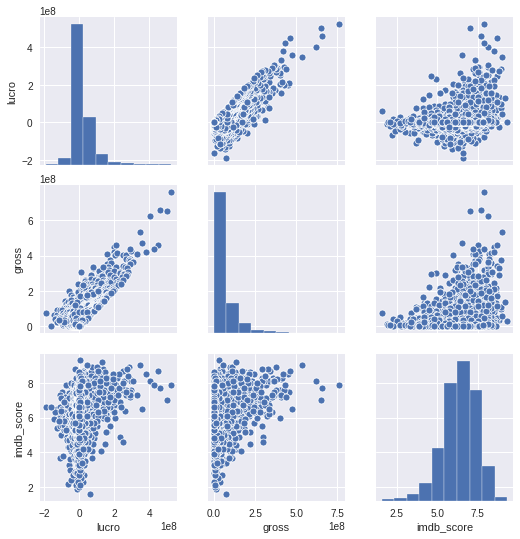

In [45]:
sns.pairplot(data=imdb_usa[['lucro', 'gross', 'imdb_score']])
plt.show()

Parece não existir uma correlação entre imdb_score x lucro e imdb_score x gross.

#Não esqueça de compartilhar a solução dos seus desafios com nossos instrutores, seja no Twitter, seja LinkedIn. Boa sorte!